# introduction
* Name: Jonathan Tuahta
* Batch: BSD-002
* Description: our hospital will implement artificial intelegence to diagnosis lung cancer by using CT SCAN photos. as a data scientist, my team are going to collect CT SCAN photos such as CT SCAN image from patient that indicates Adenocarcinoma, Large cell carcinoma, Squamous cell carcinoma, and of course normal condition image.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# create kaggle directory
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
# copy kaggle.json to new directory
!cp '/content/drive/MyDrive/kaggle.json' ~/.kaggle

In [4]:
!kaggle datasets download -d mohamedhanyyy/chest-ctscan-images

chest-ctscan-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
#unzip dataset
!unzip -q /content/chest-ctscan-images.zip -d dataset

replace dataset/Data/test/adenocarcinoma/000108 (3).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Libraries

In [6]:
# acces folder
import os
import glob
import random

# data loading
import numpy as np
import pandas as pd
import cv2

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and Models
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

# Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
import warnings

import pdb
# transfer learning
import tensorflow_hub as hub
warnings.filterwarnings('ignore')

# data loading

In [7]:
# create variables for path
main_path= '/content/dataset/Data'
os.listdir(main_path)

['train', 'valid', 'test']

In [8]:
# create variable for train, test, validation directory
train_dir = os.path.join(main_path, 'train')
test_dir = os.path.join(main_path, 'test')
val_dir = os.path.join(main_path, 'valid')
print(train_dir)
print(test_dir)
print(val_dir)

/content/dataset/Data/train
/content/dataset/Data/test
/content/dataset/Data/valid


In [9]:
# create variables train, test ,validation each for each class

#train

train_normal = len(os.listdir(os.path.join(train_dir, 'normal')))
train_large_cell_carcinoma = len(os.listdir(os.path.join(train_dir, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa')))
train_adenocarcinoma = len(os.listdir(os.path.join(train_dir, 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib')))
train_squamous_cell_carcinoma = len(os.listdir(os.path.join(train_dir, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa')))

test_normal = len(os.listdir(os.path.join(test_dir, 'normal')))
test_large_cell_carcinoma = len(os.listdir(os.path.join(test_dir, 'large.cell.carcinoma')))
test_adenocarcinoma = len(os.listdir(os.path.join(test_dir, 'adenocarcinoma')))
test_squamous_cell_carcinoma = len(os.listdir(os.path.join(test_dir, 'squamous.cell.carcinoma')))

val_normal = len(os.listdir(os.path.join(val_dir,'normal')))
val_large_cell_carcinoma = len(os.listdir(os.path.join(val_dir, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa' )))
val_adenocarcinoma = len(os.listdir(os.path.join(val_dir, 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib' )))
val_squamous_cell_carcinoma = len(os.listdir(os.path.join(val_dir, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa')))


print('count of train normal chest:' ,train_normal)
print('count of train large cell carcinoma:' ,train_large_cell_carcinoma)
print('count of trainadenocarcinoma' ,train_adenocarcinoma)
print('count of train squamous cell carcinoma' ,train_squamous_cell_carcinoma)
print("-----------------------------")
print('count of test normal chest' ,test_normal)
print('count of test large cell carcinoma' ,test_large_cell_carcinoma)
print('count of test adenocarcinoma' ,test_adenocarcinoma)
print('count of test squamous cell carcinoma' ,test_squamous_cell_carcinoma)
print("--------------------------------")
print('count of validation normal chest' ,val_normal)
print('count of validation large cell carcinoma' ,val_large_cell_carcinoma)
print('count of validation adenocarcinoma' ,val_adenocarcinoma)
print('count of validation squamous cell carcinoma' ,val_squamous_cell_carcinoma)

count of train normal chest: 148
count of train large cell carcinoma: 115
count of trainadenocarcinoma 195
count of train squamous cell carcinoma 155
-----------------------------
count of test normal chest 54
count of test large cell carcinoma 51
count of test adenocarcinoma 120
count of test squamous cell carcinoma 90
--------------------------------
count of validation normal chest 13
count of validation large cell carcinoma 21
count of validation adenocarcinoma 23
count of validation squamous cell carcinoma 15


In [10]:
train_normal= glob.glob(train_dir + '/normal/*.png')
train_large_cell_carcinoma= glob.glob(train_dir + '/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/*.png')
train_adenocarcinoma= glob.glob(train_dir + '/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/*.png')
train_squamous_cell_carcinoma= glob.glob(train_dir + '/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/*.png')

test_normal= glob.glob(test_dir + '/normal/*.png')
test_large_cell_carcinoma= glob.glob(test_dir + '/large.cell.carcinoma/*.png')
test_adenocarcinoma= glob.glob(test_dir + '/adenocarcinoma/*.png')
test_squamous_cell_carcinoma= glob.glob(test_dir + '/squamous.cell.carcinoma/*.png')

val_normal= glob.glob(val_dir + '/normal/*.png')
val_large_cell_carcinoma= glob.glob(val_dir + '/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/*.png')
val_adenocarcinoma= glob.glob(val_dir + '/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/*.png')
val_squamous_cell_carcinoma= glob.glob(val_dir + '/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/*.png')


In [11]:
'''this function is to show data for each label'''
def create_dataframe(list_of_images):
  data=[]
  for image in list_of_images:
    data.append((image, image.split('/')[-2]))

  return pd.DataFrame(data, columns= ['images', 'label'])

train_df = create_dataframe(train_normal + train_large_cell_carcinoma + train_adenocarcinoma + train_squamous_cell_carcinoma)
train_df = train_df.sample(frac=1, random_state=7).reset_index(drop=True)

test_df = create_dataframe(test_normal + test_large_cell_carcinoma + test_adenocarcinoma + test_squamous_cell_carcinoma)
test_df = test_df.sample(frac=1, random_state=7).reset_index(drop=True)

val_df = create_dataframe(val_normal + val_large_cell_carcinoma + val_adenocarcinoma + val_squamous_cell_carcinoma)
val_df = val_df.sample(frac=1, random_state=7).reset_index(drop=True)

In [12]:
# change unwanted name for train label
train_df.label = train_df.label.str.replace('adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'adenocarcinoma')
train_df.label = train_df.label.str.replace('large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'large.cell.carcinoma')
train_df.label = train_df.label.str.replace('squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa', 'squamous.cell.carcinoma')

In [13]:
# change unwanted name for val label
val_df.label = val_df.label.str.replace('adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'adenocarcinoma')
val_df.label = val_df.label.str.replace('large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'large.cell.carcinoma')
val_df.label = val_df.label.str.replace('squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa', 'squamous.cell.carcinoma')

In [14]:
train_df

,images,label
0,/content/dataset/Data/train/adenocarcinoma_lef...,adenocarcinoma
1,/content/dataset/Data/train/normal/20 - Copy (...,normal
2,/content/dataset/Data/train/squamous.cell.carc...,squamous.cell.carcinoma
3,/content/dataset/Data/train/squamous.cell.carc...,squamous.cell.carcinoma
4,/content/dataset/Data/train/adenocarcinoma_lef...,adenocarcinoma
...,...,...
596,/content/dataset/Data/train/squamous.cell.carc...,squamous.cell.carcinoma
597,/content/dataset/Data/train/squamous.cell.carc...,squamous.cell.carcinoma
598,/content/dataset/Data/train/squamous.cell.carc...,squamous.cell.carcinoma
599,/content/dataset/Data/train/large.cell.carcino...,large.cell.carcinoma


In [15]:
test_df[test_df['label']=='squamous.cell.carcinoma']

,images,label
0,/content/dataset/Data/test/squamous.cell.carci...,squamous.cell.carcinoma
1,/content/dataset/Data/test/squamous.cell.carci...,squamous.cell.carcinoma
8,/content/dataset/Data/test/squamous.cell.carci...,squamous.cell.carcinoma
18,/content/dataset/Data/test/squamous.cell.carci...,squamous.cell.carcinoma
20,/content/dataset/Data/test/squamous.cell.carci...,squamous.cell.carcinoma
...,...,...
284,/content/dataset/Data/test/squamous.cell.carci...,squamous.cell.carcinoma
287,/content/dataset/Data/test/squamous.cell.carci...,squamous.cell.carcinoma
291,/content/dataset/Data/test/squamous.cell.carci...,squamous.cell.carcinoma
297,/content/dataset/Data/test/squamous.cell.carci...,squamous.cell.carcinoma


In [16]:
print('test unique values:' ,test_df['label'].unique())
print('train unique values:' ,train_df['label'].unique())
print('val unique values:' ,val_df['label'].unique())

test unique values: ['squamous.cell.carcinoma' 'normal' 'adenocarcinoma'
 'large.cell.carcinoma']
train unique values: ['adenocarcinoma' 'normal' 'squamous.cell.carcinoma'
 'large.cell.carcinoma']
val unique values: ['large.cell.carcinoma' 'normal' 'squamous.cell.carcinoma'
 'adenocarcinoma']


In [17]:
test_df['label'].unique()

array(['squamous.cell.carcinoma', 'normal', 'adenocarcinoma',
       'large.cell.carcinoma'], dtype=object)

In [18]:
val_df.label


0        large.cell.carcinoma
1                      normal
2        large.cell.carcinoma
3     squamous.cell.carcinoma
4     squamous.cell.carcinoma
               ...           
67       large.cell.carcinoma
68    squamous.cell.carcinoma
69       large.cell.carcinoma
70    squamous.cell.carcinoma
71             adenocarcinoma
Name: label, Length: 72, dtype: object

In [19]:
# split to inference dataset

test_df, inf_df = train_test_split(test_df, test_size=0.02, random_state=7)
print(test_df)
print(inf_df)

                                                images  \
88   /content/dataset/Data/test/adenocarcinoma/0001...   
280  /content/dataset/Data/test/squamous.cell.carci...   
66   /content/dataset/Data/test/large.cell.carcinom...   
155  /content/dataset/Data/test/adenocarcinoma/0001...   
90   /content/dataset/Data/test/squamous.cell.carci...   
..                                                 ...   
211  /content/dataset/Data/test/squamous.cell.carci...   
67   /content/dataset/Data/test/adenocarcinoma/0001...   
25   /content/dataset/Data/test/squamous.cell.carci...   
196           /content/dataset/Data/test/normal/25.png   
175  /content/dataset/Data/test/adenocarcinoma/0001...   

                       label  
88            adenocarcinoma  
280  squamous.cell.carcinoma  
66      large.cell.carcinoma  
155           adenocarcinoma  
90   squamous.cell.carcinoma  
..                       ...  
211  squamous.cell.carcinoma  
67            adenocarcinoma  
25   squamous.cell.carci

# EDA

In [20]:
#function to visualize each class

def visualize_samples_by_label(df, label, num_samples):
    samples = df[df['label'] == label]['images'].iloc[:num_samples].tolist()
    num_cols = min(num_samples, 5)
    num_rows = (num_samples - 1) // num_cols + 1
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 2 * num_rows))
    count = 0
    for i in range(num_rows):
        for j in range(num_cols):
            if count < len(samples):
                sample = samples[count]
                img = cv2.imread(sample)
                ax = axes[i, j]
                ax.set_title(sample.split('/')[-1].split('\\')[-1])
                ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                ax.axis('off')
                count += 1
    plt.tight_layout()
    plt.show()

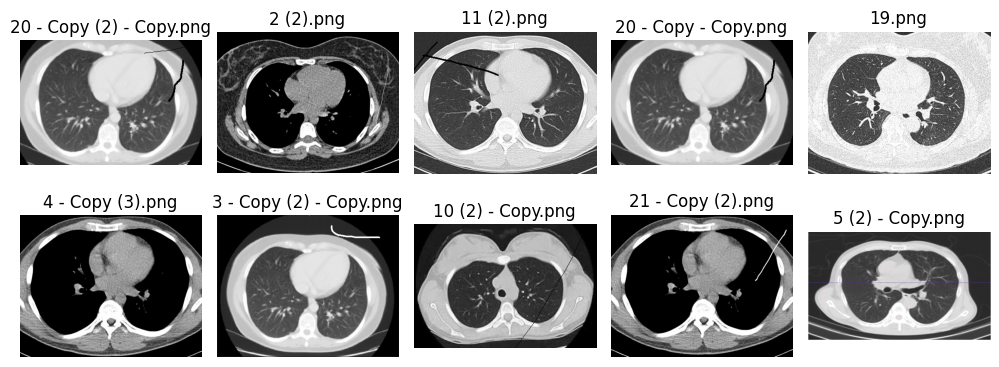

In [21]:
visualize_samples_by_label(df=train_df, label='normal', num_samples= 10)

characteristics:
- Hearts that have no cancer detected have the same size measurements
- The size of the heart is neither too small nor too large, according to the size of the patient's chest

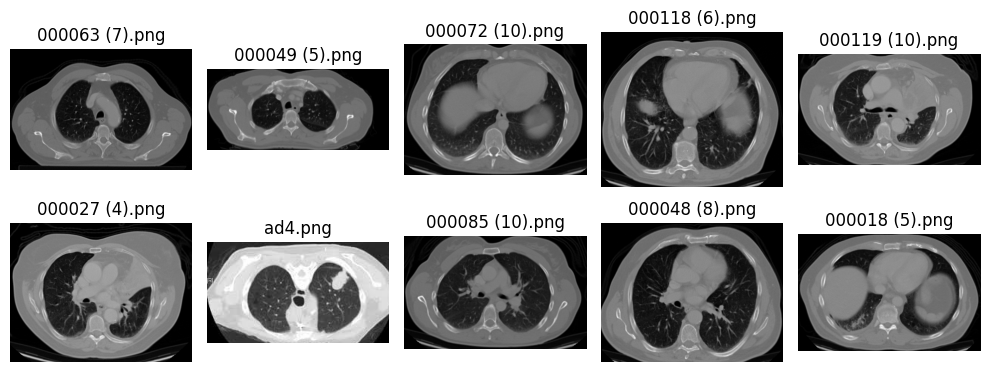

In [22]:
visualize_samples_by_label(df=train_df, label='adenocarcinoma', num_samples= 10)

he most common form of lung cancer
accounting for 30 percent of all cases overall and about 40 percent
of all non-small cell lung cancer occurrences. Adenocarcinomas are
found in several common cancers, including breast, prostate and colorectal.

Characteristic:
- there is shrinkage or enlargement of the lungs
- Ground-glass opacities may indicate early-stage adenocarcinomas.


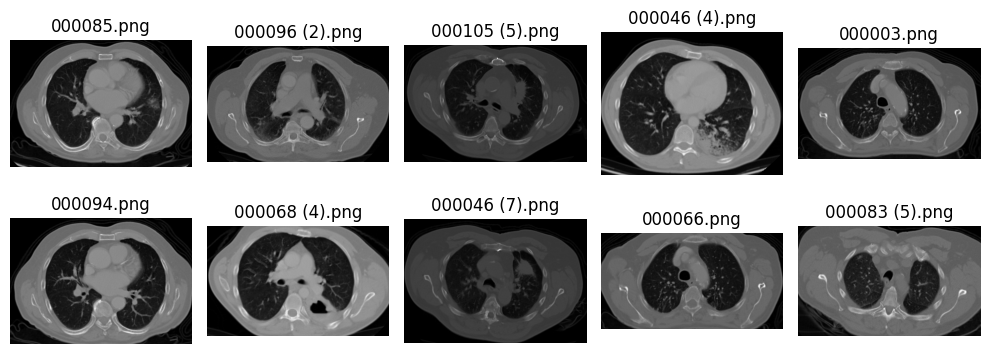

In [23]:
visualize_samples_by_label(df=train_df, label='squamous.cell.carcinoma', num_samples= 10)

squamous cell carcinoma is a type of non-small lung cancer.depends of the size of the cell, this type of cell can be different to large cell carconoma.

characteristics:
- Squamous cell carcinomas often appear as centrally located masses in the lung.
-Lesions may have distinct or spiculated margins.
- lung size mostly shriking but not like adenocarcinoma.

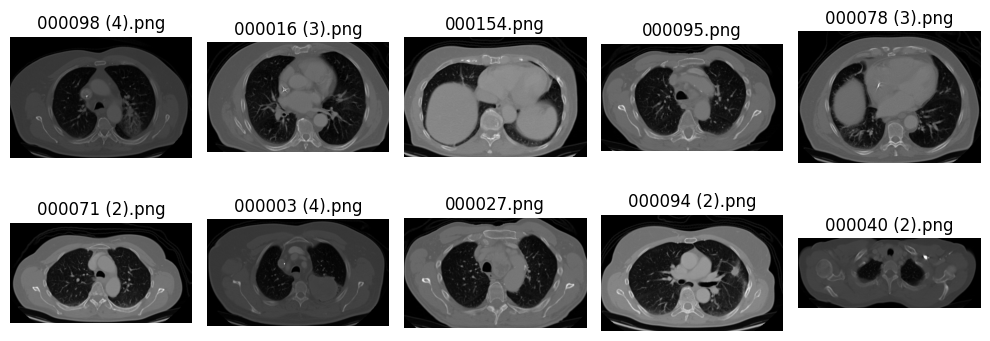

In [24]:
visualize_samples_by_label(df=train_df, label='large.cell.carcinoma', num_samples= 10)

Large cell carcinoma is a type of non-small cell lung cancer, and its characteristics in CT scans can vary.

characteristics:
- They may present as a large, solitary, or dominant mass.
- The density may be heterogeneous, and areas of necrosis or hemorrhage may be present.
- Large cell carcinomas often present as large, centrally located masses within the lung.

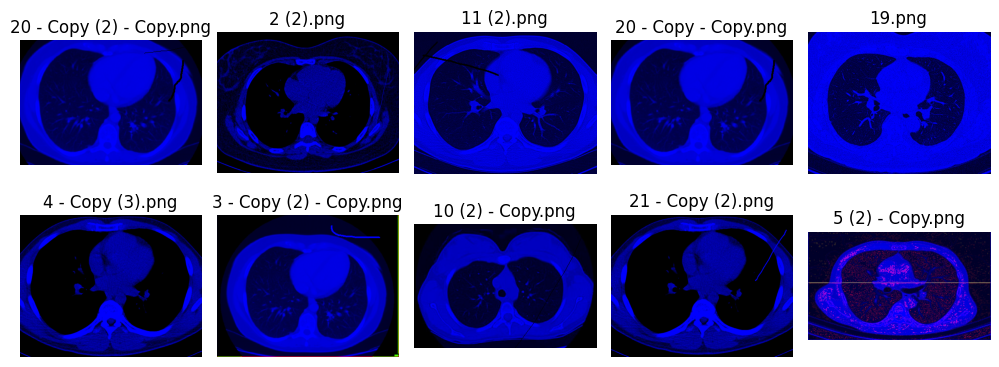

In [25]:
'''this fucntion is to make visualize in HSB'''
def visualize_samples_HSB(df, label, num_samples=10):
    samples = df[df['label'] == label]['images'].iloc[:num_samples].tolist()
    num_cols = min(num_samples, 5)
    num_rows = (num_samples - 1) // num_cols + 1
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 2 * num_rows))
    count = 0
    for i in range(num_rows):
        for j in range(num_cols):
            if count < len(samples):
                sample = samples[count]
                img = cv2.imread(sample)
                img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  # Convert to HSB color space
                ax = axes[i, j]
                ax.set_title(sample.split('/')[-1].split('\\')[-1])
                ax.imshow(img_hsv)
                ax.axis('off')
                count += 1
    plt.tight_layout()
    plt.show()

# Execute the function
visualize_samples_HSB(df=train_df, label='normal')

after we convert the image to HSB we gain information that:
- there is no lump that indicates a tumor that can affect the prediction

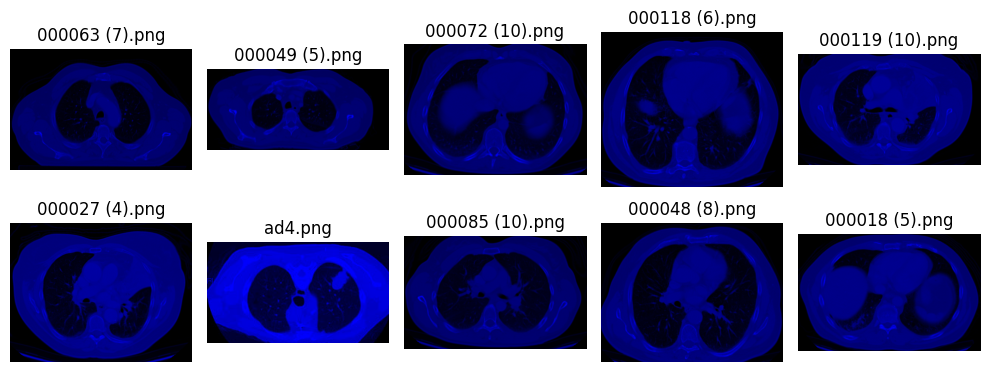

In [26]:
# Execute the function
visualize_samples_HSB(df=train_df, label='adenocarcinoma')

in this type image we know that:
- for adenocarcinoma, there is more one of lump. we can see more clearly after we convert the image to HSB

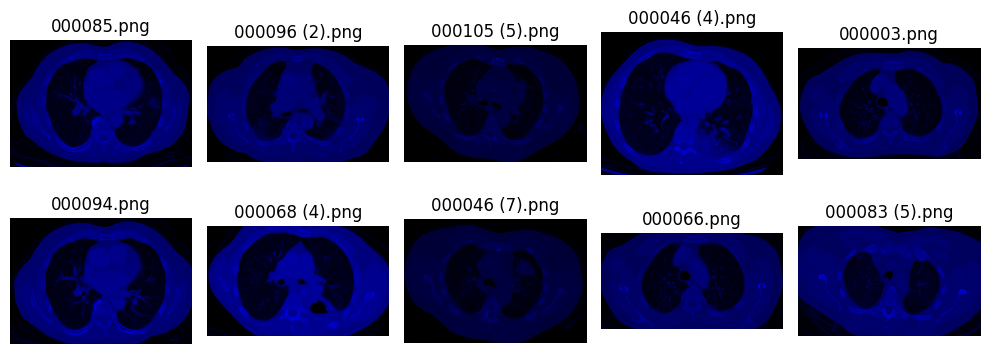

In [27]:
visualize_samples_HSB(df=train_df, label='squamous.cell.carcinoma')

for squamous cell carcinoma, we gain some information:
- its hard to find the lump that indictes tumor in lung
- the lump size is smaller than adenocarcinoma

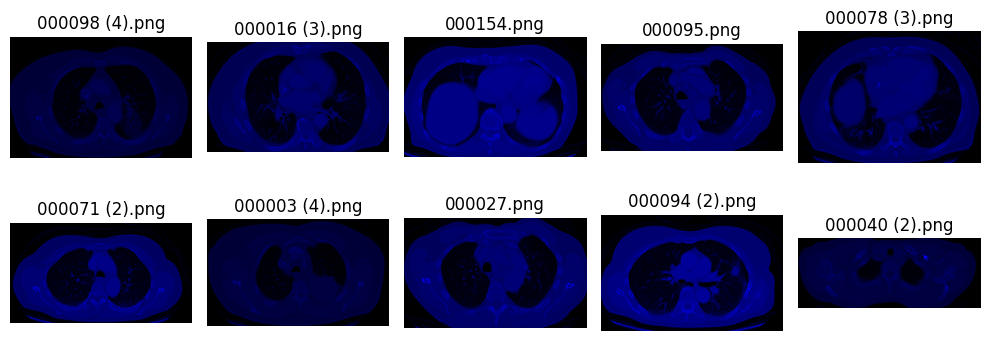

In [28]:
visualize_samples_HSB(df=train_df, label='large.cell.carcinoma')

from this image we can gain some information:
- for all types of cancer that we analyze, this type of cancer have the most big lump size
- by the analyzing the photos, we know about the lump can be more than two

In [29]:
'''this function is to visualize data in LUV type format'''
def visualize_samples_LUV(df, label, num_samples=10):
    samples = df[df['label'] == label]['images'].iloc[:num_samples].tolist()
    num_cols = min(num_samples, 5)
    num_rows = (num_samples - 1) // num_cols + 1
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 2 * num_rows))
    count = 0
    for i in range(num_rows):
        for j in range(num_cols):
            if count < len(samples):
                sample = samples[count]
                img = cv2.imread(sample)
                img_luv = cv2.cvtColor(img, cv2.COLOR_BGR2LUV)  # Convert to LUV color space
                ax = axes[i, j]
                ax.set_title(sample.split('/')[-1].split('\\')[-1])
                ax.imshow(img_luv)
                ax.axis('off')
                count += 1
    plt.tight_layout()
    plt.show()

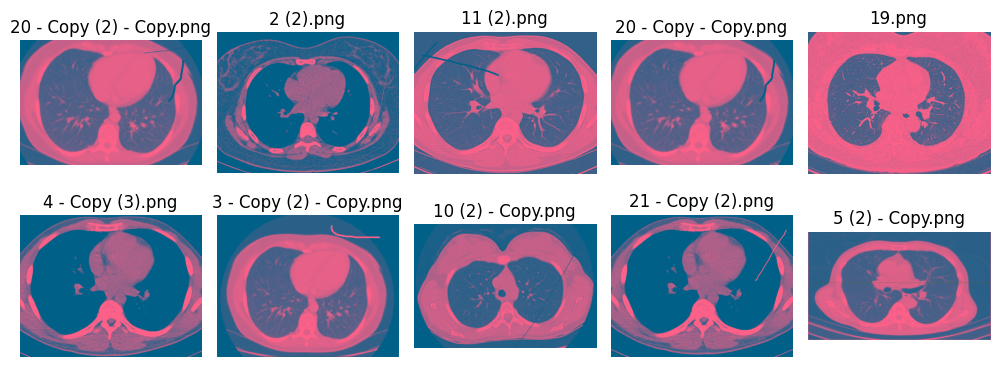

In [30]:
visualize_samples_LUV(train_df, 'normal')

its not clear to see where is the lump but we can see another details of patient lump such as lung fiber

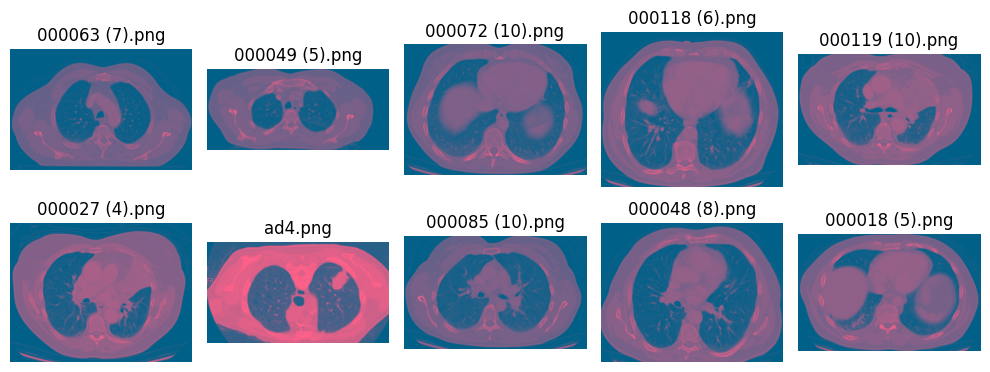

In [31]:
visualize_samples_LUV(train_df, 'adenocarcinoma')

its same when we use this type of image, but we still can see the lump size for each column

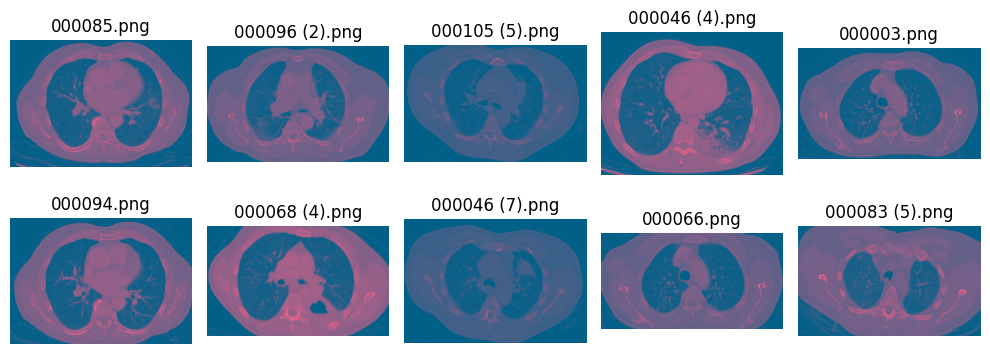

In [32]:
visualize_samples_LUV(train_df, 'squamous.cell.carcinoma' )

from this visualiztion we can see the lump for squamous cell carcinoma. its more clearly to see the small dots that indicates tumor in LUV type image that HSB type

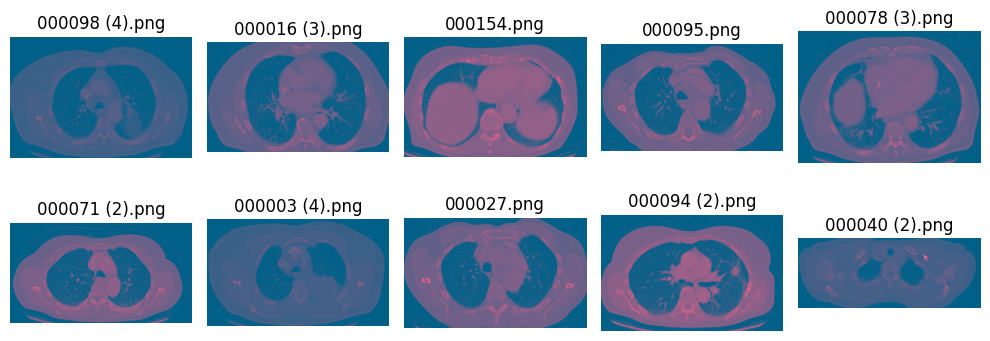

In [33]:
visualize_samples_LUV(train_df, 'large.cell.carcinoma')

for the large cell carcinoma, we can see clearly the lump, there is no differene when we see in HSB type image.

# Feature Engineering

In [34]:

# show Data
print('Size train: ', train_df.shape)
print('Size validation: ', val_df.shape)
print('Size test: ', test_df.shape)
print('Size Inference', inf_df.shape)

Size train:  (601, 2)
Size validation:  (72, 2)
Size test:  (308, 2)
Size Inference (7, 2)


## Augmentation

In [35]:

# Define setting picture

img_height= 100 # set hight image
img_width= 100  # set width image
seed=7
batch_size= 30
input=[img_height,img_width,3]


In [36]:
train_datagen = ImageDataGenerator(
              rescale= 1./255,        # This line scales down the pixel values of the images to the range of 0 to 1 by dividing them by 255.
              rotation_range= 0.1,    # Rotation is applied to the images within a range of 50 radians.
              width_shift_range= 0.2, # horizontal shifts can be applied to the images within a range of 20% of the total width.
              shear_range= 0.2,       # Shear transformations can be applied to the images within a range of 20%.
              zoom_range= 0.2,        # Zooming can be applied to the images within a range of 20%. It can zoom in or out on the objects within the images.
              horizontal_flip= True,  # Horizontal flips can be applied to the images with a 50% chance. It horizontally mirrors the images.
              vertical_flip = True    # Vertical flips can be applied to the images with a 50% chance. It vertically mirrors the images.
              )

In [37]:
# for validation data only use rescale
val_datagen = ImageDataGenerator(rescale=1./255)

# for test data only use rescale
test_datagen = ImageDataGenerator(rescale=1./255)

In [38]:
# train data
ds_train = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='sparse',
    batch_size=batch_size,
    shuffle=False,
    seed=seed)

# validation data
ds_val = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='sparse',
    batch_size=batch_size,
    shuffle=False,
    seed=seed)

# test data
ds_test = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='sparse',
    batch_size=batch_size,
    shuffle=False,
    seed=seed)

Found 601 validated image filenames belonging to 4 classes.
Found 72 validated image filenames belonging to 4 classes.
Found 308 validated image filenames belonging to 4 classes.


Text(0.5, 1.0, 'Original')

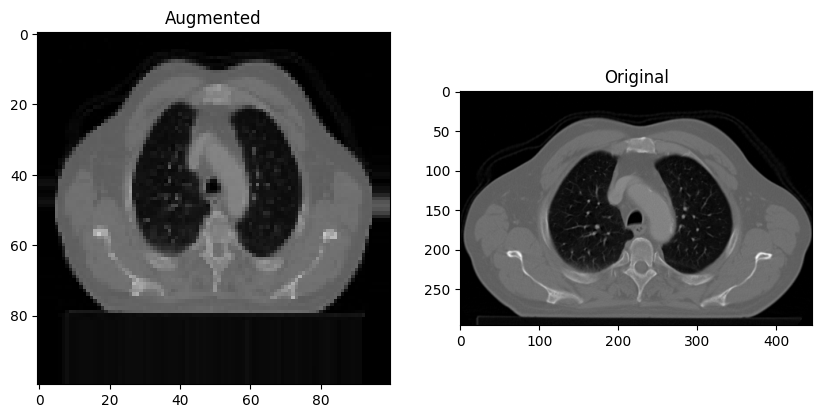

In [39]:
# Show augmented images
images, labels  = next(ds_train)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
ax[0].imshow(images[0])
ax[0].set_title('Augmented')
original = plt.imread(ds_train.filepaths[ds_train.index_array[batch_size*(ds_train.batch_index-1)]])
ax[1].imshow(original)
ax[1].set_title('Original')

In [40]:

# load class
ds_train.class_indices

{'adenocarcinoma': 0,
 'large.cell.carcinoma': 1,
 'normal': 2,
 'squamous.cell.carcinoma': 3}

# Model Definition


In [41]:
# create callbacks

callbacks = [
    EarlyStopping(monitor='val_loss', patience = 3),
    ModelCheckpoint('model.hdf5', monitor='val_loss', save_best_only=True)
]


In [42]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [43]:


# Model Architecture
model = Sequential()

# Layer Conv 1,
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=input))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Layer Conv 2
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Layer Conv 3
model.add(Conv2D(filters=4, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten
model.add(Flatten())
model.add(Dropout(0.3))

# Hidden Layer
model.add(Dense(units=32, activation='relu'))

# Output Layer
model.add(Dense(units=4, activation='softmax'))

# Summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 4)         580       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 11, 11, 4)         0

In [44]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Model Improvement

for the improvement we using transfer learning. the model that we use is Xception model from keras. there are several reason we use this model:
- Xception is based on the Inception architecture but introduces a novel approach called depthwise separable convolutions. This innovation allows the model to capture complex patterns and dependencies in data more efficiently.

- Xception achieves better parameter efficiency compared to previous architectures. It allows the model to learn a rich set of hierarchical features with fewer parameters, which is crucial for transfer learning when working with limited data.

In [45]:
seed = 15
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [46]:
# create Xception Model
pretrained_model = tf.keras.applications.Xception(include_top=False,
                                                  input_shape=input,pooling='avg')
pretrained_model.trainable = False

83683744/83683744 [==============================] - 0s 0us/step


In [47]:
# Model Definition
model_tf= Sequential()
model_tf.add(pretrained_model) # add Xception for Transfer Learning

#fully connected layer
model_tf.add(Flatten())
model_tf.add(Dense(32, activation='relu')),
model_tf.add(Dense(units=15,activation='softmax'))

In [48]:

model_tf.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [49]:

model_tf.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 dense_1 (Dense)             (None, 15)                495       
                                                                 
Total params: 20927543 (79.83 MB)
Trainable params: 66063 (258.06 KB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________


# Model Training

In [50]:

# Training Based Model

%%time
history_model= model.fit(ds_train, batch_size= batch_size,
                           epochs= 30, validation_data= ds_val,
                           callbacks= callbacks)



Epoch 1/30
21/21 [==============================] - 14s 589ms/step - loss: 1.3809 - accuracy: 0.2496 - val_loss: 1.4041 - val_accuracy: 0.3056
Epoch 2/30
21/21 [==============================] - 10s 451ms/step - loss: 1.3239 - accuracy: 0.3228 - val_loss: 1.3956 - val_accuracy: 0.3056
Epoch 3/30
21/21 [==============================] - 11s 489ms/step - loss: 1.2912 - accuracy: 0.3111 - val_loss: 1.3176 - val_accuracy: 0.3611
Epoch 4/30
21/21 [==============================] - 12s 568ms/step - loss: 1.2663 - accuracy: 0.4027 - val_loss: 1.3731 - val_accuracy: 0.2917
Epoch 5/30
21/21 [==============================] - 12s 556ms/step - loss: 1.2146 - accuracy: 0.4659 - val_loss: 1.2087 - val_accuracy: 0.5000
Epoch 6/30
21/21 [==============================] - 10s 462ms/step - loss: 1.1911 - accuracy: 0.5025 - val_loss: 1.1867 - val_accuracy: 0.3750
Epoch 7/30
21/21 [==============================] - 10s 457ms/step - loss: 1.1473 - accuracy: 0.5458 - val_loss: 1.1407 - val_accuracy: 0.4583

In [51]:
# Training Improvement Model
%%time
history4= model_tf.fit(ds_train, batch_size= batch_size,
                           epochs= 30, validation_data= ds_val,
                           callbacks= callbacks)

Epoch 1/30
21/21 [==============================] - 34s 1s/step - loss: 1.5927 - accuracy: 0.3810 - val_loss: 1.1173 - val_accuracy: 0.4583
Epoch 2/30
21/21 [==============================] - 26s 1s/step - loss: 1.0478 - accuracy: 0.5408 - val_loss: 1.0017 - val_accuracy: 0.5417
Epoch 3/30
21/21 [==============================] - 30s 1s/step - loss: 0.9747 - accuracy: 0.5458 - val_loss: 1.0723 - val_accuracy: 0.4444
Epoch 4/30
21/21 [==============================] - 26s 1s/step - loss: 0.9238 - accuracy: 0.5890 - val_loss: 0.9509 - val_accuracy: 0.5278
Epoch 5/30
21/21 [==============================] - 30s 1s/step - loss: 0.8832 - accuracy: 0.6190 - val_loss: 0.9079 - val_accuracy: 0.5556
Epoch 6/30
21/21 [==============================] - 29s 1s/step - loss: 0.8838 - accuracy: 0.5923 - val_loss: 0.9342 - val_accuracy: 0.5139
Epoch 7/30
21/21 [==============================] - 29s 1s/step - loss: 0.8655 - accuracy: 0.6356 - val_loss: 0.9047 - val_accuracy: 0.5833
Epoch 8/30
21/21 [==

# Model Evaluation

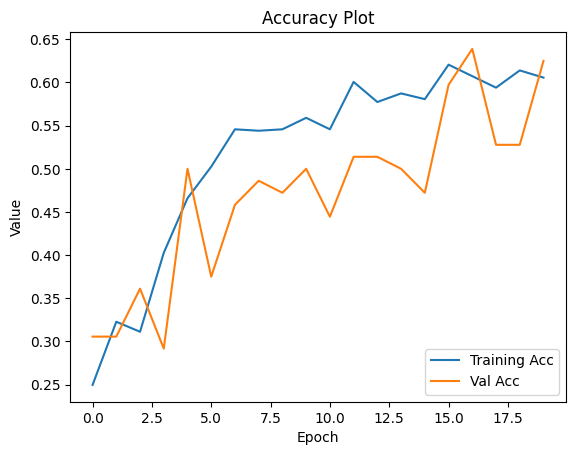

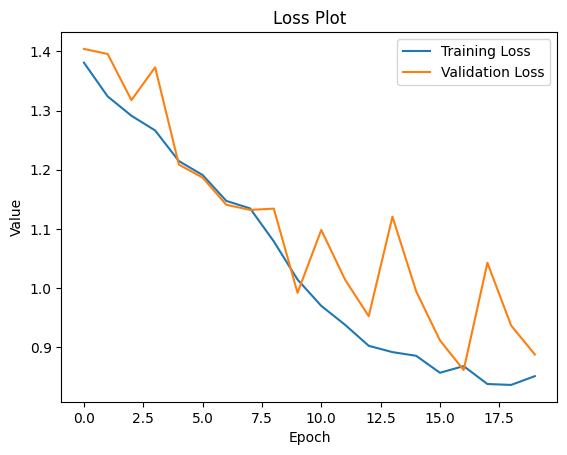

In [52]:
# plot result Based Model

plt.plot(history_model.history['accuracy'], label='Training Acc')
plt.plot(history_model.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

#loss train & validation from based model
plt.plot(history_model.history['loss'], label='Training Loss')
plt.plot(history_model.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()




as we can see from the plot we know about:
- the graph of loss and accuracy show how the bad is this model build
- the loss score is higher than accuracy score. it means this model is underfit

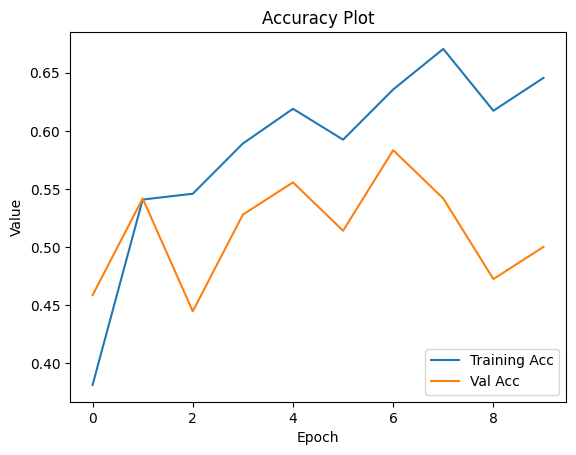

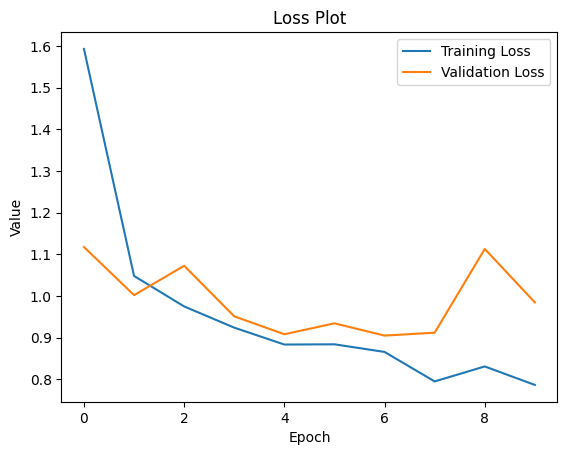

In [53]:
# train accuracy score from improvement model
plt.plot(history4.history['accuracy'], label='Training Acc')
plt.plot(history4.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

#train loss score from improvement model
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()



for the improvement result, the score still shows bad (underfit) but there is improvement for the score. so we will use this model as the best model to predict

In [54]:
# result Loss and Accuracy
test_results = model.evaluate(ds_test, verbose=0)
print(f'Test Loss     : {test_results[0]:.4f}')
print(f'Test Accuracy : {test_results[1]:.4f}')

Test Loss     : 0.8699
Test Accuracy : 0.5617


In [55]:
# Predict test data
prediction = model.predict(ds_test)

11/11 [==============================] - 6s 514ms/step


In [56]:
y_pred = np.argmax(model.predict(ds_test), axis=-1)
y_pred

11/11 [==============================] - 2s 187ms/step


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 3, 1, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 3, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 1, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 3, 0, 2, 2, 0,
       0, 3, 2, 3, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 3,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 3, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 0,
       0, 0, 0, 3, 0, 2, 0, 3, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 0,
       0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 3, 0, 0,
       0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [57]:
class_names = ['normal', 'adenocarcinoma', 'large.cell.carcinoma','squamous.cell.carcinoma']

In [58]:
# change number to string in class
y_pred1=np.array(class_names)[y_pred]

In [59]:
y_pred1

array(['normal', 'normal', 'adenocarcinoma', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'large.cell.carcinoma',
       'squamous.cell.carcinoma', 'adenocarcinoma', 'normal',
       'large.cell.carcinoma', 'normal', 'normal', 'normal',
       'large.cell.carcinoma', 'large.cell.carcinoma', 'normal', 'normal',
       'large.cell.carcinoma', 'large.cell.carcinoma', 'normal',
       'large.cell.carcinoma', 'normal', 'normal', 'normal',
       'adenocarcinoma', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'large.cell.carcinoma', 'normal',
       'large.cell.carcinoma', 'normal', 'normal', 'large.cell.carcinoma',
       'normal', 'normal', 'normal', 'normal', 'squamous.cell.carcinoma',
       'normal', 'normal', 'normal', 'large.cell.carcinoma', 'normal',
       'large.cell.carcinoma', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'large.cell.carcinoma',
       'normal', 'normal', 'normal', 'norm

In [60]:
# create dataframe to save prediction
pred_result_1 = pd.DataFrame(y_pred1, columns=['y_pred'])

In [61]:
pred_result_1

,y_pred
0,normal
1,normal
2,adenocarcinoma
3,normal
4,normal
...,...
303,normal
304,normal
305,normal
306,large.cell.carcinoma


In [62]:
# reset index
test_df_reset = test_df.reset_index(drop=True)

In [63]:
test_df_reset

,images,label
0,/content/dataset/Data/test/adenocarcinoma/0001...,adenocarcinoma
1,/content/dataset/Data/test/squamous.cell.carci...,squamous.cell.carcinoma
2,/content/dataset/Data/test/large.cell.carcinom...,large.cell.carcinoma
3,/content/dataset/Data/test/adenocarcinoma/0001...,adenocarcinoma
4,/content/dataset/Data/test/squamous.cell.carci...,squamous.cell.carcinoma
...,...,...
303,/content/dataset/Data/test/squamous.cell.carci...,squamous.cell.carcinoma
304,/content/dataset/Data/test/adenocarcinoma/0001...,adenocarcinoma
305,/content/dataset/Data/test/squamous.cell.carci...,squamous.cell.carcinoma
306,/content/dataset/Data/test/normal/25.png,normal


In [64]:
# concat label and y_pred
result_model_pred1 = pd.concat([test_df_reset, pred_result_1], axis=1)
result_model_pred1 = result_model_pred1.reset_index(drop=True)
result_model_pred1[['label', 'y_pred']]

,label,y_pred
0,adenocarcinoma,normal
1,squamous.cell.carcinoma,normal
2,large.cell.carcinoma,adenocarcinoma
3,adenocarcinoma,normal
4,squamous.cell.carcinoma,normal
...,...,...
303,squamous.cell.carcinoma,normal
304,adenocarcinoma,normal
305,squamous.cell.carcinoma,normal
306,normal,large.cell.carcinoma


from this prediction we gain infromation that there is a lot of miss answer. so, we dont want to use this model.

In [65]:
# resul Loss and Accuracy
test_results2 = model_tf.evaluate(ds_test, verbose=0)
print(f'Test Loss     : {test_results2[0]:.4f}')
print(f'Test Accuracy : {test_results2[1]:.4f}')

Test Loss     : 0.9629
Test Accuracy : 0.5649


In [66]:

# predict using Transfer learning model
prediction2 = model_tf.predict(ds_test)

11/11 [==============================] - 12s 1s/step


In [67]:

y_pred2 = np.argmax(model_tf.predict(ds_test), axis=-1)
y_pred2

11/11 [==============================] - 13s 1s/step


array([0, 3, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 2, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3,
       0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 2, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       3, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 3, 1, 2, 0, 0, 1, 0, 0, 0, 3,
       0, 0, 3, 0, 0, 2, 0, 2, 0, 3, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0,

In [68]:

# change number to string in class
y_pred2=np.array(class_names)[y_pred2]

In [69]:

y_pred2

array(['normal', 'squamous.cell.carcinoma', 'normal', 'normal', 'normal',
       'normal', 'squamous.cell.carcinoma', 'normal', 'normal',
       'large.cell.carcinoma', 'normal', 'normal', 'large.cell.carcinoma',
       'large.cell.carcinoma', 'normal', 'normal', 'normal',
       'large.cell.carcinoma', 'large.cell.carcinoma', 'normal', 'normal',
       'large.cell.carcinoma', 'large.cell.carcinoma', 'normal',
       'large.cell.carcinoma', 'normal', 'normal',
       'squamous.cell.carcinoma', 'normal', 'normal', 'normal', 'normal',
       'large.cell.carcinoma', 'normal', 'normal', 'normal',
       'large.cell.carcinoma', 'normal', 'normal', 'normal', 'normal',
       'large.cell.carcinoma', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'large.cell.carcinoma',
       'large.cell.carcinoma', 'large.cell.carcinoma', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'large.cell.carcinoma',
       'normal', 'normal', 'normal', 'nor

In [70]:

# create dataframe
pred_result_pred2 = pd.DataFrame(y_pred2, columns=['y_pred_improve'])

In [71]:
pred_result_pred2

,y_pred_improve
0,normal
1,squamous.cell.carcinoma
2,normal
3,normal
4,normal
...,...
303,squamous.cell.carcinoma
304,normal
305,normal
306,large.cell.carcinoma


In [72]:

# concat test data and result prediction
result_model_pred2 = pd.concat([test_df_reset, pred_result_pred2], axis=1)
result_model_pred2 = result_model_pred2.reset_index(drop=True)
result_model_pred2[['label', 'y_pred_improve']]

,label,y_pred_improve
0,adenocarcinoma,normal
1,squamous.cell.carcinoma,squamous.cell.carcinoma
2,large.cell.carcinoma,normal
3,adenocarcinoma,normal
4,squamous.cell.carcinoma,normal
...,...,...
303,squamous.cell.carcinoma,squamous.cell.carcinoma
304,adenocarcinoma,normal
305,squamous.cell.carcinoma,normal
306,normal,large.cell.carcinoma


# Model Saving


In [73]:
# freezing model
model_tf.trainable = False

In [74]:
# Save ANN Model
model_tf.save('best_model.h5', save_format='h5')

# Model Inference (in different notebook)

# Conclusion

from this dataset we know that for each label have different characteristics for example `adenocarcinoma` have diffrerent size of lump tham   `squamous cell carcinoma`. this also applies for each labels.

for the modelling we use `relu` and `softmax` as the activation parameter. the reason we use `relu` parameter because we dont want the result negative and using `softmax` because we have multi-labeled target.

for the improvement we use `Xception` model as the transfer learning. the reason we using this model because this model is more efficient for the CNN type model.

after we compare the based model and improvement model. we decide to using improvement model as the best model for predict althought both model have low accuracy score and still underfit.

**recommendation**
- this model suitable for patient who wants to check their condition. this machine learning purpose is to assist dictor to diagnose the disease.

**limitation**
- this model is needed to rebuild. because this model show bad score.
- we have to store more photos as data to make machine learning more train.